In [42]:
"""
Regression with NBA_player_of_the_week.csv 1155 data rows
https://www.kaggle.com/datasets
NBA players of Week 
Player of the week data from 1984-5 to current season (Cur2018-9)
Jacob Baruch (Version 3)
Original 1155 rows; 14 rows 
"""

'\nRegression with NBA_player_of_the_week.csv 1155 data rows\nhttps://www.kaggle.com/datasets\nNBA players of Week \nPlayer of the week data from 1984-5 to current season (Cur2018-9)\nJacob Baruch (Version 3)\nOriginal 1155 rows; 14 rows \n'

In [43]:
def read_file_auto(filename):
    line_count = 0
    file_read = open(filename,"r")
    file_write = open("fixed-NBA_player_of_the_week.csv", "w")
    for line in iter(file_read):
        line_no_newline = line.rstrip()
        line_split = line_no_newline.split(",")
        if "" in line_split:
            line_count += 1
            print("Bad line number:",line_count)
            continue  
        else:
            line_count += 1
            file_write.write(line)
    file_read.close()
    file_write.close()
    return

In [44]:
read_file_auto("NBA_player_of_the_week.csv")

Bad line number: 2
Bad line number: 3
Bad line number: 4
Bad line number: 5
Bad line number: 6
Bad line number: 7
Bad line number: 8
Bad line number: 9
Bad line number: 10
Bad line number: 11
Bad line number: 12
Bad line number: 13
Bad line number: 14
Bad line number: 15
Bad line number: 16
Bad line number: 17
Bad line number: 18
Bad line number: 19
Bad line number: 20
Bad line number: 21
Bad line number: 22
Bad line number: 23
Bad line number: 24
Bad line number: 25
Bad line number: 26
Bad line number: 27
Bad line number: 28
Bad line number: 29
Bad line number: 30
Bad line number: 31
Bad line number: 32
Bad line number: 33
Bad line number: 34
Bad line number: 35
Bad line number: 36
Bad line number: 37
Bad line number: 38
Bad line number: 39
Bad line number: 40
Bad line number: 41
Bad line number: 42
Bad line number: 43
Bad line number: 44
Bad line number: 45
Bad line number: 46
Bad line number: 47
Bad line number: 48
Bad line number: 49
Bad line number: 50
Bad line number: 51
Bad line

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [91]:
df = pd.read_csv('fixed-NBA_player_of_the_week.csv') 
print("Dataframe shape: ",df.shape,"\n") # 392 rows + header
print(df.head())

Dataframe shape:  (771, 14) 

   Active season        Player               Team Conference          Date  \
0              0   Paul Pierce     Boston Celtics       East   Apr 7, 2002   
1              0    Tim Duncan  San Antonio Spurs       West   Apr 7, 2002   
2              0   Ben Wallace    Detroit Pistons       East  Mar 31, 2002   
3              0  Shawn Marion       Phoenix Suns       West  Mar 31, 2002   
4              0    Jason Kidd    New Jersey Nets       East  Mar 24, 2002   

  Position Height  Weight  Age  Draft Year  Seasons in league     Season  \
0       SF    6-7     235   24        1998                  3  2001-2002   
1       FC   6-11     250   25        1997                  4  2001-2002   
2       FC    6-9     240   27        1996                  5  2001-2002   
3        F    6-7     228   23        1999                  2  2001-2002   
4       PG    6-4     210   28        1994                  7  2001-2002   

   Season short  Real_value  
0          200

In [92]:
df = df.drop("Real_value",axis=1)
df = df.drop("Season short",axis=1)
df = df.drop ("Active season",axis=1)
df = df.drop ("Conference",axis=1)
df = df.drop("Season",axis=1)
df = df.drop("Draft Year",axis=1)
df = df.drop("Date",axis=1)
df = df.drop("Team",axis=1)
df = df.drop("Position",axis=1)
df = df.drop("Player",axis=1)
df = df.drop("Height",axis=1)

In [93]:
print(df.head())

   Weight  Age  Seasons in league
0     235   24                  3
1     250   25                  4
2     240   27                  5
3     228   23                  2
4     210   28                  7


In [94]:
df.describe()

,Weight,Age,Seasons in league
count,771.000000,771.000000,771.000000
mean,226.372244,26.565499,6.238651
std,30.481635,3.348472,3.240588
min,165.000000,19.000000,0.000000
25%,205.000000,24.000000,4.000000
50%,228.000000,26.000000,6.000000
75%,250.000000,28.000000,8.000000
max,325.000000,40.000000,17.000000


In [95]:
print(df[0:5])

   Weight  Age  Seasons in league
0     235   24                  3
1     250   25                  4
2     240   27                  5
3     228   23                  2
4     210   28                  7


In [96]:
print(df[-5:])

     Weight  Age  Seasons in league
766     200   30                 10
767     242   24                  5
768     190   30                  9
769     184   28                  7
770     250   24                  3


In [98]:
# Normalizing dfpr because data is dispersed.
from sklearn import preprocessing
float_array = df.values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array)
df_normalized = pd.DataFrame(scaled_array,columns = ["Player Weight","Age","Years in League"])
print("Dataframe shape: ",df_normalized.shape,"\n") # 392 rows, 7 columns + header

Dataframe shape:  (771, 3) 



In [99]:
print(df_normalized[0:5])
# print(df_normalized[-5:])

   Player Weight       Age  Years in League
0        0.43750  0.238095         0.176471
1        0.53125  0.285714         0.235294
2        0.46875  0.380952         0.294118
3        0.39375  0.190476         0.117647
4        0.28125  0.428571         0.411765


/home/ykashima/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2961: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0xa7b7b36c>,
      dtype=object)

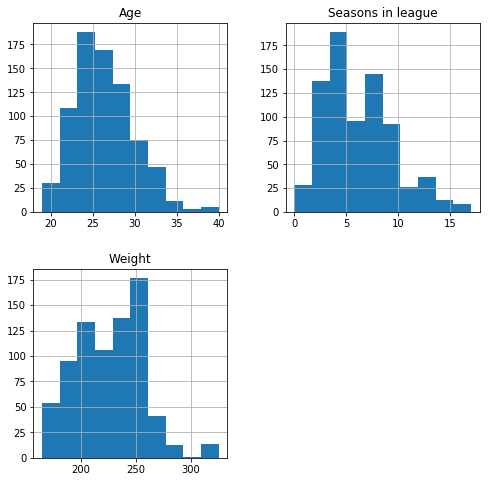

In [100]:
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
df.hist(ax = ax)

/home/ykashima/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2961: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0xa7b7b16c>,
      dtype=object)

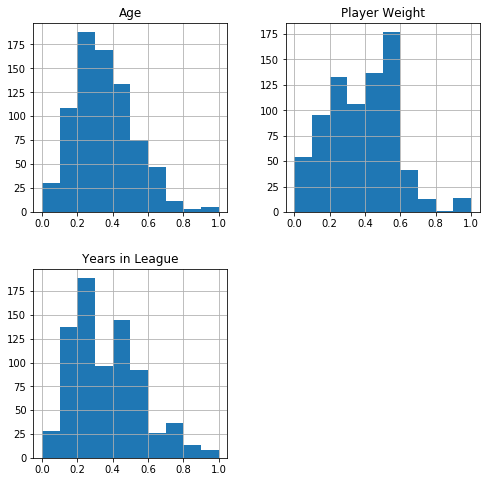

In [101]:
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
df_normalized.hist(ax = ax)

In [102]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    labels = ["m","mpg","cylinders","displacement","horsepower","weight","acceleration","year"]
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    ax1.set_xticklabels(labels,fontsize=6)
    ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.show()

In [103]:
df.corr()

,Weight,Age,Seasons in league
Weight,1.000000,-0.059031,0.023107
Age,-0.059031,1.000000,0.911513
Seasons in league,0.023107,0.911513,1.000000


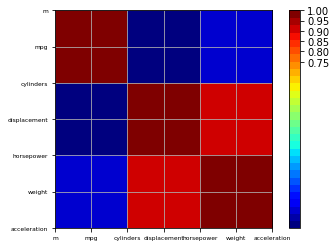

In [104]:
correlation_matrix(df) # original data

In [105]:
df_normalized.corr()

,Player Weight,Age,Years in League
Player Weight,1.000000,-0.059031,0.023107
Age,-0.059031,1.000000,0.911513
Years in League,0.023107,0.911513,1.000000


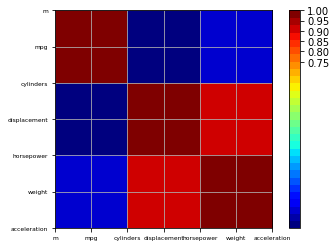

In [106]:
correlation_matrix(df_normalized) # normalized data

In [20]:
X = df_normalized.drop('mpg',axis=1)
y = df_normalized['mpg']

In [21]:
# Split data to training and test
from sklearn.model_selection import train_test_split
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
print("X_train shape: ",X_train.shape) # 294 rows, 6 columns
print("y_train shape: ",y_train.shape) # 294 rows, 1 column
print("X_test shape: ",X_test.shape) # 98 rows, 6 columns
print("y_test shape: ",y_test.shape) # 98 rows, 1 column
# print(y_train)

X_train shape:  (294, 6)
y_train shape:  (294,)
X_test shape:  (98, 6)
y_test shape:  (98,)


In [22]:
# Training models in Python dictionary
import math
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge

# Next line is "dictionary" data structure from class 1
d_models = {"Linear_Regression": LinearRegression(),
            "Ridge": Ridge(alpha=0.5),
            "Lasso": Lasso(alpha=0.1),
            "LassoLars": LassoLars(alpha=0.1),
            "BayesianRidge": BayesianRidge()}
models_list = d_models.keys()
print(models_list)

dict_keys(['Linear_Regression', 'Ridge', 'Lasso', 'LassoLars', 'BayesianRidge'])


In [27]:
for regression_model in models_list:
    regressor = d_models[regression_model]
    regressor.fit(X_train,y_train)
    y_predict = regressor.predict(X_test)
    regression_model_mse = mean_squared_error(y_predict, y_test)
    print(regression_model," ",math.sqrt(regression_model_mse))
    ##From the output the one with least sqrt of (MeanSquareError) is the best fit.
    ##In this case BayesianRidge is the best

Linear_Regression   0.0964521327815362
Ridge   0.09658071800222987
Lasso   0.22473205510307503
LassoLars   0.22473205510307503
BayesianRidge   0.09622827500001652


In [23]:
# Training model  Regression one more times with winning model
from sklearn.linear_model import BayesianRidge
lm = BayesianRidge()
lm.fit(X_train, y_train)
print(lm.intercept_)
print(lm.coef_)
print ("Number of coefficients is ",len(lm.coef_))

0.459963959067748
[-0.0012727   0.02855689  0.00597503 -0.62086694  0.06906028  0.23813814]
Number of coefficients is  6


In [24]:
import math
from sklearn.metrics import mean_squared_error
y_predict = lm.predict(X_test)
regression_model_mse = mean_squared_error(y_predict, y_test)
print(math.sqrt(regression_model_mse))

0.09622827500001647


In [25]:
# Try to make predictions on unknown data
# Put mpg = 20 as dummy value
# Cylinders – 4
# Displacement – 121
# Horsepower – 110
# Weight – 2800
# Acceleration – 15.4
# Year – 81

In [26]:
#First Test with new data.  Prediction will start
first_test = np.array([[20,4,121,110,2800,15.4,81]])
print("Starting predict request:",first_test)

Starting predict request: [[  20.     4.   121.   110.  2800.    15.4   81. ]]


In [27]:
first_test_transform = min_max_scaler.transform(first_test) # apply the same transform
print("Normalized new test row :",first_test_transform)

Normalized new test row : [[0.29255319 0.2        0.1369509  0.34782609 0.33654664 0.44047619
  0.91666667]]


In [28]:
test_1 = list(first_test_transform[0][1:7]) # Extract all values excluding mpg
test_seq = [test_1] # make a list of list

In [29]:
test_result = lm.predict(test_seq) # apply model prediction
print("Test result MPG (still normalized): ",test_result[0]) # this is still normalized mpg result

Test result MPG (still normalized):  0.505460603323559


In [30]:
first_test_transform[0][0] = test_result[0] # put result back, replace dummy with predicted
print("Test row with predicted (still normalized): ",first_test_transform)

Test row with predicted (still normalized):  [[0.5054606  0.2        0.1369509  0.34782609 0.33654664 0.44047619
  0.91666667]]


In [31]:
result = min_max_scaler.inverse_transform(first_test_transform) # apply inverse transform
print("Final test result: ",result)
print("Predicted MPG: ",result[0][0])

Final test result:  [[  28.00531868    4.          121.          110.         2800.
    15.4          81.        ]]
Predicted MPG:  28.00531868496582


In [25]:
# Above test is Saab and actual MPG is 26